<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/03%20Machine%20Learning/notebooks/P3-Practica-Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⭕ Parte I: Clasificación

Este conjunto de datos, proporcionado por Avazu, contiene registros de publicidad en línea (como impresiones de anuncios y clicks) recolectados durante 11 días. El objetivo es predecir la probabilidad de que un usuario haga clic en un anuncio (CTR), una métrica crítica para optimizar campañas de sponsored search y real-time bidding. La práctica consiste en desarrollar un modelo de clasificación para este fin, utilizando características como el tipo de dispositivo, contexto de la página y datos anónimos del usuario.

La descripción completa de las features se proporciona a continuación:

| Nombre Columna      | Tipo (Ejemplo)           | Descripción                                                                 | ¿Relevante para Modelo? |
|---------------------|--------------------------|-----------------------------------------------------------------------------|-------------------------|
| `id`               | String (ej: "100000")    | Identificador único del registro (anuncio).                                 | ❌ No                   |
| **`click`**        | **Binaria (0/1)**        | **Variable target**: 0 = No hubo clic, 1 = Sí hubo clic.                    | ✅ **Sí**               |
| `year`, `month`, `hour`             | Int        | Año, mes y hora           | ✅ Sí  |
| `C1`               | Categórica anónima       | Variable categórica encriptada (sin contexto definido).                     | ✅ Sí                   |
| `banner_pos`       | Numérica/Categórica      | Posición del banner en la página (ej: 0, 1, 2...).                          | ✅ Sí                   |
| `site_id`          | Categórica (ej: "1fbe01")| ID del sitio web donde se muestra el anuncio.                               | ✅ Sí (alta cardinalidad) |
| `site_domain`      | Categórica (ej: "f38457")| Dominio del sitio web.                                                      | ⚠️ Tal vez (redundante con `site_id`) |
| `site_category`    | Categórica (ej: "28905b")| Categoría del sitio (ej: noticias, deportes...).                            | ✅ Sí                   |
| `app_id`           | Categórica (ej: "ecadf6")| ID de la aplicación (si el anuncio se muestra en una app móvil).             | ✅ Sí (alta cardinalidad) |
| `app_domain`       | Categórica (ej: "7801e8")| Dominio de la aplicación.                                                   | ⚠️ Tal vez (redundante con `app_id`) |
| `app_category`     | Categórica (ej: "07d7df")| Categoría de la aplicación (ej: juegos, redes sociales...).                 | ✅ Sí                   |
| `device_id`        | Categórica (ej: "a99f2a")| ID del dispositivo del usuario.                                             | ⚠️ Alta cardinalidad (¿agrupar?) |
| `device_ip`        | Categórica (ej: "d1b8b4")| Dirección IP del dispositivo.                                               | ❌ No (a menos que se agrupe por región) |
| `device_model`     | Categórica (ej: "8a4875")| Modelo del dispositivo (ej: iPhone X, Samsung Galaxy S10...).               | ✅ Sí                   |
| `device_type`      | Categórica (ej: 1, 2)    | Tipo de dispositivo (ej: 1 = móvil, 2 = tablet, etc.).                      | ✅ Sí                   |
| `device_conn_type` | Categórica (ej: 0, 2)    | Tipo de conexión (ej: 0 = WiFi, 2 = 4G...).                                 | ✅ Sí                   |
| `C14` - `C21`      | Categóricas anónimas     | Variables categóricas encriptadas (sin contexto definido).                   | ✅ Sí (evaluar importancia) |

Dataset: https://www.kaggle.com/competitions/avazu-ctr-prediction/data

In [1]:
import pandas as pd

url = 'https://github.com/DCDPUAEM/DCDP/raw/refs/heads/main/03%20Machine%20Learning/data/ctr_prediction.csv'

df = pd.read_csv(url)
df = df.drop(df.columns[0], axis=1)
df

,click,C1,banner_pos,site_id,site_category,app_id,app_category,device_model,device_type,device_conn_type,...,C15,C16,C17,C18,C19,C20,C21,year,month,day
0,0,1005,0,1fbe01fe,28905ebd,ecad2386,07d7df22,44956a24,1,2,...,320,50,1722,0,35,-1,79,2014,10,21
1,0,1005,0,1fbe01fe,28905ebd,ecad2386,07d7df22,711ee120,1,0,...,320,50,1722,0,35,100084,79,2014,10,21
2,0,1005,0,1fbe01fe,28905ebd,ecad2386,07d7df22,8a4875bd,1,0,...,320,50,1722,0,35,100084,79,2014,10,21
3,0,1005,0,1fbe01fe,28905ebd,ecad2386,07d7df22,6332421a,1,0,...,320,50,1722,0,35,100084,79,2014,10,21
4,0,1005,1,fe8cc448,0569f928,ecad2386,07d7df22,779d90c2,1,0,...,320,50,2161,0,35,-1,157,2014,10,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,1005,0,85f751fd,50e219e0,5e3f096f,0f2161f8,be74e6fe,1,0,...,320,50,2480,3,297,100111,61,2014,10,21
99996,0,1005,0,1fbe01fe,28905ebd,ecad2386,07d7df22,711ee120,1,0,...,320,50,1722,0,35,-1,79,2014,10,21
99997,1,1005,0,1fbe01fe,28905ebd,ecad2386,07d7df22,293291c1,1,0,...,320,50,1722,0,35,-1,79,2014,10,21
99998,0,1005,0,1fbe01fe,28905ebd,ecad2386,07d7df22,8a4875bd,1,0,...,320,50,1722,0,35,-1,79,2014,10,21


## Instrucciones

0. Verifica si hay valores faltantes.
1. Extrae la variable target `click`. Verifica el balanceo de clases.
2. Quita las variables que consideres necesarias de acuerdo a la tabla anterior.
3. Forma la matriz de features `X`.
4. Convierte las variables categóricas en variables binarias mediante el one-hot encoding ([`get_dummies`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) de pandas). No olvides el hiperparámetro `drop_first=True` y `dtype=int`. Vas a obtener un dataframe con muchas columnas, es decir, ahora tenemos una muy alta dimensionalidad.
5. Divide en train/test
6. Verifica los rangos de las variables numéricas que tienes para la tarea de clasificación.
7. Realiza reducción de dimensionalidad con PCA con todas las componentes principales.
8. Escoge un número de componentes principales de manera que te quedes con el $\sim$80% de varianza.
9. Entrena un clasificador de tu elección en el conjunto de prueba. Evalua con la métrica F1-score
10. Reporta, además, la matriz de confusión.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Cargar datos y extraer target
url = "https://github.com/DCDPUAEM/DCDP/raw/main/03%20Machine%20Learning/data/ctr_prediction.csv"
df = pd.read_csv(url)
# Quitemos columnas con alta cardinalidad
df = df.drop(['app_id', 'site_id'], axis=1)
y = df['click']  # Variable target
X = df.drop('click', axis=1)

# Verificar balanceo de clases
print("\n1. Balance de clases:")
print(y.value_counts(normalize=True))

# 2. One-Hot Encoding para variables categóricas
X_encoded = pd.get_dummies(X, drop_first=True, dtype=int)
print(f"\n2. Dimensiones después de One-Hot: {X_encoded.shape}")

# 3. Dividir en train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Verificar rangos de variables numéricas
print("\n4. Rango de variables numéricas originales:")
print(X.describe().loc[['min', 'max']])

# 5. Estandarizar datos y aplicar PCA completo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca_full = PCA()
X_train_pca_full = pca_full.fit_transform(X_train_scaled)

# 6. Seleccionar componentes para ~80% de varianza
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.8) + 1
print(f"\n6. Componentes para 80% varianza: {n_components}/{len(pca_full.components_)}")

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 7. Entrenar y evaluar modelo (Random Forest)
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

f1 = f1_score(y_test, y_pred)
print(f"\n7. F1-Score: {f1:.4f}")

# 8. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()


1. Balance de clases:
click
0    0.8251
1    0.1749
Name: proportion, dtype: float64

2. Dimensiones después de One-Hot: (100000, 2521)

4. Rango de variables numéricas originales:
     Unnamed: 0      C1  banner_pos  device_type  device_conn_type      C14  \
min         0.0  1001.0         0.0          0.0               0.0    375.0   
max     99999.0  1010.0         5.0          5.0               5.0  21705.0   

       C15    C16     C17  C18     C19       C20    C21    year  month   day  
min  120.0   20.0   112.0  0.0    33.0      -1.0   13.0  2014.0   10.0  21.0  
max  728.0  480.0  2497.0  3.0  1835.0  100248.0  157.0  2014.0   10.0  21.0  

6. Componentes para 80% varianza: 1859/2521


In [ ]:
# Verificar valores nulos por columna
df.isnull().sum()
# 1. Extraer la variable target
y = df['click'].values
# 2. Quitar variables que no aportan
print(df.columns)
print(f'Las columnas en cuestión ya no están')
print()
X = df.drop('click', axis=1)
df.dtypes



Index(['click', 'C1', 'banner_pos', 'site_id', 'site_category', 'app_id',
       'app_category', 'device_model', 'device_type', 'device_conn_type',
       'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'year', 'month',
       'day'],
      dtype='object')
Las columnas en cuestión ya no están



,0
click,int64
C1,int64
banner_pos,int64
site_id,object
site_category,object
app_id,object
app_category,object
device_model,object
device_type,int64
device_conn_type,int64


In [ ]:
X = pd.get_dummies(data=X,columns=['site_id', 'site_category', 'app_id', 'app_category', 'device_model'],
                       drop_first=True,dtype=int)

,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,...,device_model_ff3242b8,device_model_ff503cfe,device_model_ff607a1a,device_model_ff717dd1,device_model_ff91ea03,device_model_ffb16766,device_model_ffcd1497,device_model_ffe3ae81,device_model_ffe69079,device_model_ffeafe15
0,1005,0,1,2,15706,320,50,1722,0,35,...,0,0,0,0,0,0,0,0,0,0
1,1005,0,1,0,15704,320,50,1722,0,35,...,0,0,0,0,0,0,0,0,0,0
2,1005,0,1,0,15704,320,50,1722,0,35,...,0,0,0,0,0,0,0,0,0,0
3,1005,0,1,0,15706,320,50,1722,0,35,...,0,0,0,0,0,0,0,0,0,0
4,1005,1,1,0,18993,320,50,2161,0,35,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1005,0,1,0,21611,320,50,2480,3,297,...,0,0,0,0,0,0,0,0,0,0
99996,1005,0,1,0,15702,320,50,1722,0,35,...,0,0,0,0,0,0,0,0,0,0
99997,1005,0,1,0,15702,320,50,1722,0,35,...,0,0,0,0,0,0,0,0,0,0
99998,1005,0,1,0,15708,320,50,1722,0,35,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#X_train.describe()


In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

 En este punto, la sesión falla porque se termina la RAM disponible

# ⭕ Parte II: Segmentación y Recomendación

El dataset MovieLens 100K contiene información de 1682 películas, cada una representada por su título y 18 géneros cinematográficos (Action, Adventure, Drama, etc.), codificados como variables binarias. Estos datos, recolectados de calificaciones de 943 usuarios, permiten analizar las características intrínsecas de las películas independientemente de las preferencias de los usuarios.

El objetivo de esta práctica es realizar segmentación de películas mediante técnicas de clustering (como K-Means o clustering jerárquico) para identificar grupos naturales basados en sus géneros. Esto podría revelar patrones como *películas de acción con toques de sci-fi* o *dramas románticos con elementos musicales*, útiles para sistemas de recomendación o catálogos personalizados.

[Dataset completo en Kaggle](https://www.kaggle.com/datasets/prajitdatta/movielens-100k-dataset/data)

In [2]:
import os
import pandas as pd
import kagglehub
import numpy as np

path = kagglehub.dataset_download("prajitdatta/movielens-100k-dataset")
path = '/root/.cache/kagglehub/datasets/prajitdatta/movielens-100k-dataset/versions/1/ml-100k'
fname = os.path.join(path, 'u.item')

movies_df = pd.read_csv(fname, sep='|', encoding='latin-1', names=[
    'movie_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL',
    'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime',
    'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
    'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'
])

def get_year(date):
    try:
        return int(date.split('-')[-1])
    except:
        return np.nan

movies_df.drop(['video_release_date', 'unknown','IMDb_URL','movie_id'], axis=1, inplace=True)
movies_df['date'] = movies_df['release_date'].apply(get_year)
movies_df.drop('release_date', axis=1, inplace=True)
movies_df

100%|██████████| 4.77M/4.77M [00:00<00:00, 133MB/s]

Extracting files...


,title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,date
0,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1995.0
1,GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1995.0
2,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1995.0
3,Get Shorty (1995),1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1995.0
4,Copycat (1995),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,Mat' i syn (1997),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1998.0
1678,B. Monkey (1998),0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1998.0
1679,Sliding Doors (1998),0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1998.0
1680,You So Crazy (1994),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1994.0


## Instrucciones

1. Verifica si hay variables faltantes.
2. Extraer las variables numéricas para formar la matriz de caracteristicas $X$.
3. Verifica los rangos de las variables, aplica re-escalamiento si lo consideras necesario.
4. Usa K-Means con algún valor $K$ de tu elección, haz clustering y mide el valor de silueta.
5. Encuentra el valor de codo y con ese valor, vuelve a hacer clustering y mide el valor de silueta.
6. Con el valor de $K$ que consideres mejor, extrae las etiquetas de los clusters y añadelas al dataframe `movies_df`.
7. Muestra un dataframe por cada cluster mostrando los títulos de las películas de cada cluster. ¿Es posible identificar, visualmente, qué define a cada cluster?


In [3]:
# Verificar valores nulos por columna
movies_df.isna().sum()

,0
title,0
Action,0
Adventure,0
Animation,0
Children's,0
Comedy,0
Crime,0
Documentary,0
Drama,0
Fantasy,0


In [4]:
movies_df.dropna(subset=['date'],inplace=True)
movies_df.reset_index(inplace=True,drop=True)
display(movies_df.isna().sum())

,0
title,0
Action,0
Adventure,0
Animation,0
Children's,0
Comedy,0
Crime,0
Documentary,0
Drama,0
Fantasy,0


In [5]:
# Extraer las variables numéricas para formar la matriz de caracteristicas  X .

X = movies_df.select_dtypes(include=np.number)
X

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,date
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1995.0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1995.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1995.0
3,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1995.0
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1998.0
1677,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1998.0
1678,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1998.0
1679,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1994.0


In [6]:
# Verifica los rangos de las variables

X.describe().loc[['min', 'max']]

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,date
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1922.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1998.0


In [7]:
# Reescala la columna "date"

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X['date'] = scaler.fit_transform(X[['date']])
X.describe().loc[['min', 'max']]

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,date
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Silhouette score for K=5: 0.33765471786436707


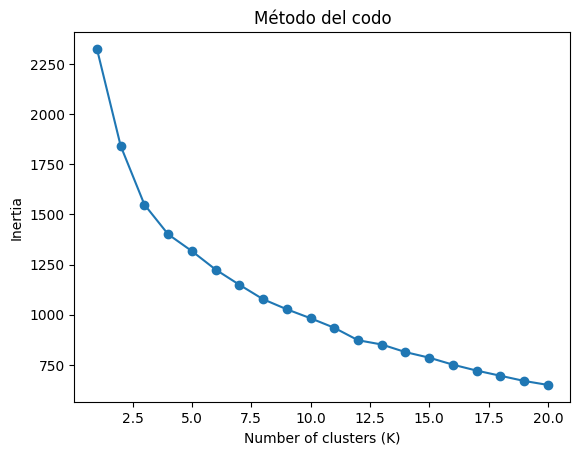

Silhouette score for optimal K=4: 0.3410427265177315

Movies in Cluster 0:


,title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,date
4,Copycat (1995),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1995.0
5,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1995.0
6,Twelve Monkeys (1995),0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1995.0
8,Dead Man Walking (1995),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1995.0
9,Richard III (1995),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1996.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1674,"War at Home, The (1996)",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1996.0
1675,Sweet Nothing (1995),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1996.0
1676,Mat' i syn (1997),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1998.0
1678,Sliding Doors (1998),0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1998.0



Movies in Cluster 1:


,title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,date
0,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1995.0
3,Get Shorty (1995),1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1995.0
7,Babe (1995),0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1995.0
12,Mighty Aphrodite (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1995.0
15,French Twist (Gazon maudit) (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1657,Getting Away With Murder (1996),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1996.0
1662,8 Heads in a Duffel Bag (1997),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1997.0
1666,Wedding Bell Blues (1996),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1997.0
1668,Tainted (1998),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1998.0



Movies in Cluster 2:


,title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,date
2,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1995.0
10,Seven (Se7en) (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1995.0
11,"Usual Suspects, The (1995)",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1995.0
31,Crumb (1994),0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1994.0
37,"Net, The (1995)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627,Nico Icon (1995),0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1995.0
1630,Land and Freedom (Tierra y libertad) (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1996.0
1639,Dadetown (1995),0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1996.0
1650,Temptress Moon (Feng Yue) (1996),0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1997.0



Movies in Cluster 3:


,title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,date
1,GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1995.0
16,From Dusk Till Dawn (1996),1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1996.0
20,Muppet Treasure Island (1996),1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1996.0
23,Rumble in the Bronx (1995),1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1996.0
26,Bad Boys (1995),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,Nemesis 2: Nebula (1995),1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1995.0
1608,"Truth or Consequences, N.M. (1997)",1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1997.0
1613,Warriors of Virtue (1997),1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1997.0
1616,King of New York (1990),1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1990.0


In [10]:
# Usa K-Means con algún valor  K  de tu elección, haz clustering y mide el valor de silueta, encuentra el valor de codo

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k = 5 # Puedes cambiar este valor
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X)

# Mide el valor de silueta
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Silhouette score for K={k}: {silhouette_avg}")

# Encuentra el valor de codo
inertia = []
max_k = 20 # Puedes ajustar el rango de K
for i in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Graficamos la curva
import matplotlib.pyplot as plt

plt.plot(range(1, max_k + 1), inertia, marker='o')
plt.title('Método del codo')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.show()

# Con base en la curva de codo, se elige una K y se corre K-means de nuevo
optimal_k = 4 # Reemplazar con el valor determinado según la gráfica
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_optimal.fit(X)

# Measure the silhouette score for the optimal K
silhouette_optimal = silhouette_score(X, kmeans_optimal.labels_)
print(f"Silhouette score for optimal K={optimal_k}: {silhouette_optimal}")

# Extraemos las etiquetas del cluster y las agregamos al dataframe
movies_df['cluster_label'] = kmeans_optimal.labels_

# Mostramos dataframe por cluster
for cluster_id in range(optimal_k):
    print(f"\nMovies in Cluster {cluster_id}:")
    display(movies_df[movies_df['cluster_label'] == cluster_id][['title'] + list(movies_df.columns[1:-1])])

